In [1]:
%matplotlib inline

In [2]:
from clawpack.geoclaw import dtopotools
import numpy as np
import matplotlib.pyplot as pl

In [3]:
fault = dtopotools.SiftFault({'acszb2':1.})

In [4]:
lims = fault.containing_rect()

x0 = lims[0]-1.
x1 = lims[1]+1.

y0 = lims[2]-1.
y1 = lims[3]+1.

x = np.linspace(x0,x1,100)
y = np.linspace(y0,y1,100)
fault.subfaults[0].slip = -1.
dtopo0 = fault.create_dtopography(x,y,times=[0.])

/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


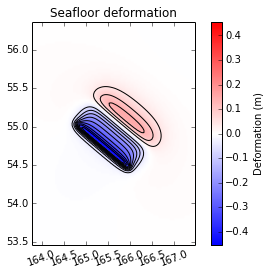

In [5]:
dtopo0.plot_dZ_colors(0.);

In [6]:
subfault0 = fault.subfaults[0]
subfault0.coordinate_specification

'noaa sift'

In [7]:
[subfault0.strike, subfault0.dip, subfault0.rake]

[310.17, 17.0, 90.0]

In [38]:
rect_corners = subfault0.corners

rect_corners[0][2] = -rect_corners[0][2] 
rect_corners[1][2] = -rect_corners[1][2] 
rect_corners[2][2] = -rect_corners[2][2] 
rect_corners[3][2] = -rect_corners[3][2] 

In [39]:

subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [rect_corners[0],rect_corners[1],rect_corners[2]]
subfault1.calculate_geometry_triangles()

subfault2 = dtopotools.SubFault()
subfault2.slip = 1.
subfault2.coordinate_specification = 'triangular'
subfault2._corners = [rect_corners[0],rect_corners[2],rect_corners[3]]
subfault2.calculate_geometry_triangles()

In [40]:
print np.array(rect_corners)

[[   164.77256579     55.03484865  -5000.        ]
 [   165.25732146     55.36361659 -19618.58523614]
 [   166.45827854     54.78318341 -19618.58523614]
 [   165.97352287     54.45441547  -5000.        ]]


In [41]:
# rake = 162.5

subfault1.strike = subfault0.strike
subfault1.dip = subfault0.dip
subfault1.rake = subfault0.rake

subfault2.strike = subfault0.strike
subfault2.dip = subfault0.dip
subfault2.rake = subfault0.rake

In [42]:
print 'subfault0 strike: ', subfault1.strike
print 'subfault1 strike: ', subfault2.strike
print 'strike difference: ', subfault2.strike - subfault1.strike
print '---'
print 'subfault0 dip: ', subfault1.dip
print 'subfault1 dip: ', subfault2.dip
print '---'
print 'subfault0 rake: ', subfault1.rake
print 'subfault1 rake: ', subfault2.rake
print '---'
print 'subfault0 unit slip vector: ', subfault1._get_unit_slip_vector()
print 'subfault1 unit slip vector: ', subfault2._get_unit_slip_vector()

subfault0 strike:  310.17
subfault1 strike:  310.17
strike difference:  0.0
---
subfault0 dip:  17.0
subfault1 dip:  17.0
---
subfault0 rake:  90.0
subfault1 rake:  90.0
---
subfault0 unit slip vector:  [-0.61687172 -0.73074487  0.2923717 ]
subfault1 unit slip vector:  [-0.61687172 -0.73074487  0.2923717 ]


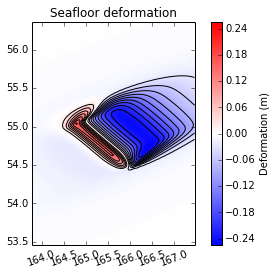

In [45]:
rake = 90.

subfault1.rake = rake
subfault2.rake = rake

fault1 = dtopotools.Fault()
fault1.subfaults = []

fault1.subfaults.append(subfault1)
fault1.subfaults.append(subfault2)

dtopo1 = fault1.create_dtopography(x,y,times=[0.])
dtopo1.plot_dZ_colors(0.)

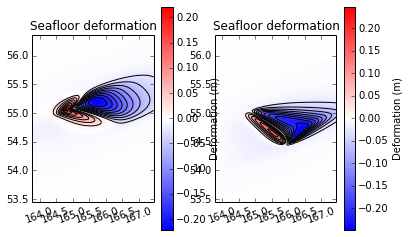

In [46]:
f,ax = pl.subplots(1,2);
dtopo1 = subfault1.okada(x,y)
dtopo2 = subfault2.okada(x,y)
dtopo1.plot_dZ_colors(0.,axes=ax[0]);
dtopo2.plot_dZ_colors(0.,axes=ax[1]);